# Sentiment Analysis in Python

This notebook is part of a tutorial that can be found on my [youtube channel here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw), please check it out!

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

In [ ]:
#

In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install nltk
import nltk
nltk.download('all')

%pip install --upgrade ipywidgets
%pip install --upgrade jupyterlab

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
     -                                        0.0/1.5 MB 245.8 kB/s eta 0:00:06
     -                                        0.1/1.5 MB 328.6 kB/s eta 0:00:05
     -                                        0.1/1.5 MB 328.6 kB/s eta 0:00:05
     ----                                     0.2/1.5 MB 583.1 kB/s eta 0:00:03
     -----                                    0.2/1.5 MB 655.1 kB/s eta 0:00:02
     -------                                  0.3/1.5 MB 710.0 kB/s eta 0:00:02
     --------                                 0.3/1.5 MB 761.4 kB/s eta 0:00:02
     ------------                             0.5/1.5 MB 962.7 kB/s eta 0:00:02
     ----------------                         0.6/1.5 MB 1.2 MB/s eta 0:00:


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\sudhanvasp\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\sudhanvasp\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\sudhanvasp\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\sudhanvasp\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_gra

                                              0.0/139.3 kB ? eta -:--:--
     --                                       10.2/139.3 kB ? eta -:--:--
     -----                                 20.5/139.3 kB 217.9 kB/s eta 0:00:01
     -----                                 20.5/139.3 kB 217.9 kB/s eta 0:00:01
     -----                                 20.5/139.3 kB 217.9 kB/s eta 0:00:01
     ----------------                      61.4/139.3 kB 252.2 kB/s eta 0:00:01
     -------------------                   71.7/139.3 kB 245.8 kB/s eta 0:00:01
     ------------------------              92.2/139.3 kB 275.8 kB/s eta 0:00:01
     ------------------------              92.2/139.3 kB 275.8 kB/s eta 0:00:01
     ------------------------              92.2/139.3 kB 275.8 kB/s eta 0:00:01
     ------------------------              92.2/139.3 kB 275.8 kB/s eta 0:00:01
     ------------------------              92.2/139.3 kB 275.8 kB/s eta 0:00:01
     ------------------------              92.2/139.3


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB 281.8 kB/s eta 0:00:33
                                              0.0/9.2 MB 281.8 kB/s eta 0:00:33
                                              0.0/9.2 MB 281.8 kB/s eta 0:00:33
                                              0.1/9.2 MB 245.8 kB/s eta 0:00:38
                                              0.1/9.2 MB 245.8 kB/s eta 0:00:38
                                              0.1/9.2 MB 249.8 kB/s eta 0:00:37
                                              0.1/9.2 MB 273.1 kB/s eta 0:00:34
                                              0.1/9.2 MB 273.1 kB/s eta 0:00:34
     


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%jupyter nbextension enable --py widgetsnbextension

UsageError: Line magic function `%jupyter` not found.


In [3]:
from ipywidgets import IntProgress
from IPython.display import display


for i in range(100):
    progress_bar.value = i

NameError: name 'progress_bar' is not defined

# Step 0. Read in Data and NLTK Basics

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [6]:
# Read in data
df = pd.read_csv('D:/Storage/79/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Quick EDA

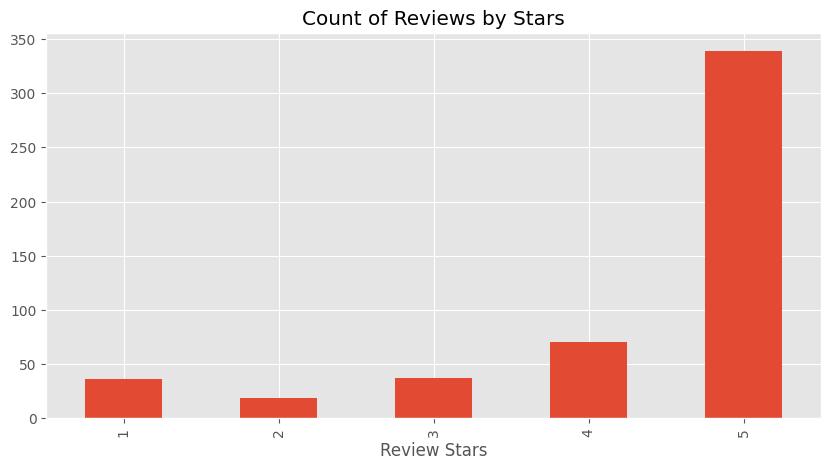

In [8]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [9]:
import random
example = df['Text'][random.randint(0, len(df['Text']) - 1)]
print(example)

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.


In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('confection', 'NN'),
 ('that', 'WDT'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('around', 'IN'),
 ('a', 'DT'),
 ('few', 'JJ')]

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  confection/NN
  that/WDT
  has/VBZ
  been/VBN
  around/IN
  a/DT
  few/JJ
  centuries/NNS
  ./.
  It/PRP
  is/VBZ
  a/DT
  light/JJ
  ,/,
  pillowy/JJ
  citrus/NN
  gelatin/NN
  with/IN
  nuts/NNS
  -/:
  in/IN
  this/DT
  case/NN
  Filberts/NNP
  ./.
  And/CC
  it/PRP
  is/VBZ
  cut/VBN
  into/IN
  tiny/JJ
  squares/NNS
  and/CC
  then/RB
  liberally/RB
  coated/VBN
  with/IN
  powdered/JJ
  sugar/NN
  ./.
  And/CC
  it/PRP
  is/VBZ
  a/DT
  tiny/JJ
  mouthful/NN
  of/IN
  heaven/NN
  ./.
  Not/RB
  too/RB
  chewy/JJ
  ,/,
  and/CC
  very/RB
  flavorful/JJ
  ./.
  I/PRP
  highly/RB
  recommend/VBP
  this/DT
  yummy/JJ
  treat/NN
  ./.
  If/IN
  you/PRP
  are/VBP
  familiar/JJ
  with/IN
  the/DT
  story/NN
  of/IN
  C.S/NNP
  ./.
  (PERSON Lewis/NNP)
  '/POS
  ``/``
  The/DT
  (ORGANIZATION Lion/NNP)
  ,/,
  The/DT
  (GPE Witch/NNP)
  ,/,
  and/CC
  The/DT
  (ORGANIZATION Wardrobe/NNP)
  ''/''
  -/:
  this/DT
  is/VBZ
  the/DT
  treat/NN
  that/WDT
  sedu

# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores(' happy!')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6114}

In [15]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [17]:
sia.polarity_scores(example)

{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}

In [18]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

## Plot VADER results

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
%pip install textblob
%pip install transformers
%pip install scipy
%pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# VADER results on example
print(example)
sia.polarity_scores(example)

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [ ]:
results_df.columns

# Step 3. Combine and compare

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

In [ ]:
# nevative sentiment 5-Star view

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

# Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline('Make sure to like and subscribe!')

In [ ]:
sent_pipeline('booo')

# The End